In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

# Preparing The Data

Citation: https://www.kaggle.com/aryansakhala/five-personality-clusters

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls #to know the path of data

gdrive	sample_data


In [ ]:
data_path = Path('/mydrive/superprof/data-final.csv') #to get the data

In [ ]:
df = pd.read_csv(data_path, sep='\t') #t is tab, because this data is separated by tab
df #calling the table

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [ ]:
df.columns
#to know the column number

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

In [ ]:
df.dtypes

EXT1                     float64
EXT2                     float64
EXT3                     float64
EXT4                     float64
EXT5                     float64
                          ...   
endelapse                  int64
IPC                        int64
country                   object
lat_appx_lots_of_err      object
long_appx_lots_of_err     object
Length: 110, dtype: object

In [ ]:
df.dtypes.value_counts() #106 primary, 4 derived

float64    104
object       4
int64        2
dtype: int64

In [ ]:
df.select_dtypes(include=("object"))

,dateload,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,2016-03-03 02:01:01,GB,51.5448,0.1991
1,2016-03-03 02:01:20,MY,3.1698,101.706
2,2016-03-03 02:01:56,GB,54.9119,-1.3833
3,2016-03-03 02:02:02,GB,51.75,-1.25
4,2016-03-03 02:02:57,KE,1.0,38.0
...,...,...,...,...
1015336,2018-11-08 12:04:58,US,39.9883,-75.2208
1015337,2018-11-08 12:07:18,US,38.0,-97.0
1015338,2018-11-08 12:07:49,US,36.1473,-86.777
1015339,2018-11-08 12:08:34,US,34.1067,-117.8067


In [ ]:
df.select_dtypes(include=("int","float"))

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4436.0,3116.0,2992.0,4354.0,768.0,1024.0,9.0,234.0,6,1
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2718.0,3374.0,3096.0,3019.0,1360.0,768.0,12.0,179.0,11,1
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2043.0,6295.0,1585.0,2529.0,1366.0,768.0,3.0,186.0,7,1
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2984.0,4192.0,3480.0,3257.0,1920.0,1200.0,186.0,219.0,7,1
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,6846.0,5320.0,11401.0,8642.0,1366.0,768.0,8.0,315.0,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2744.0,2025.0,1873.0,1232.0,1920.0,1080.0,3.0,160.0,10,2
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,4064.0,1144.0,2936.0,1615.0,1920.0,1080.0,3.0,122.0,7,1
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2727.0,2648.0,2646.0,1287.0,1920.0,1080.0,2.0,135.0,12,6
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,3129.0,2799.0,7184.0,2526.0,1920.0,1080.0,6.0,212.0,8,1


In [ ]:
df.isnull().sum() #to know the data that is empty

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
                         ... 
endelapse                   0
IPC                         0
country                    77
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64

In [ ]:
df=df.dropna(subset=['EXT1']) #to drop the null variable

In [ ]:
df.drop(df.columns[50:110], axis=1)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [ ]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = ['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']
EST = ['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10']
AGR = ['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']
CSN = ['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']
OPN = ['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']


# Data Visualization and Central Tendency

Citation: https://www.kaggle.com/aryansakhala/five-personality-clusters

In [ ]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(0,10):
        plt.subplot(10,3,i+1)
        plt.hist(df[groupname[i]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i]], fontsize=38)

Q&As Related to Extroversion Personality


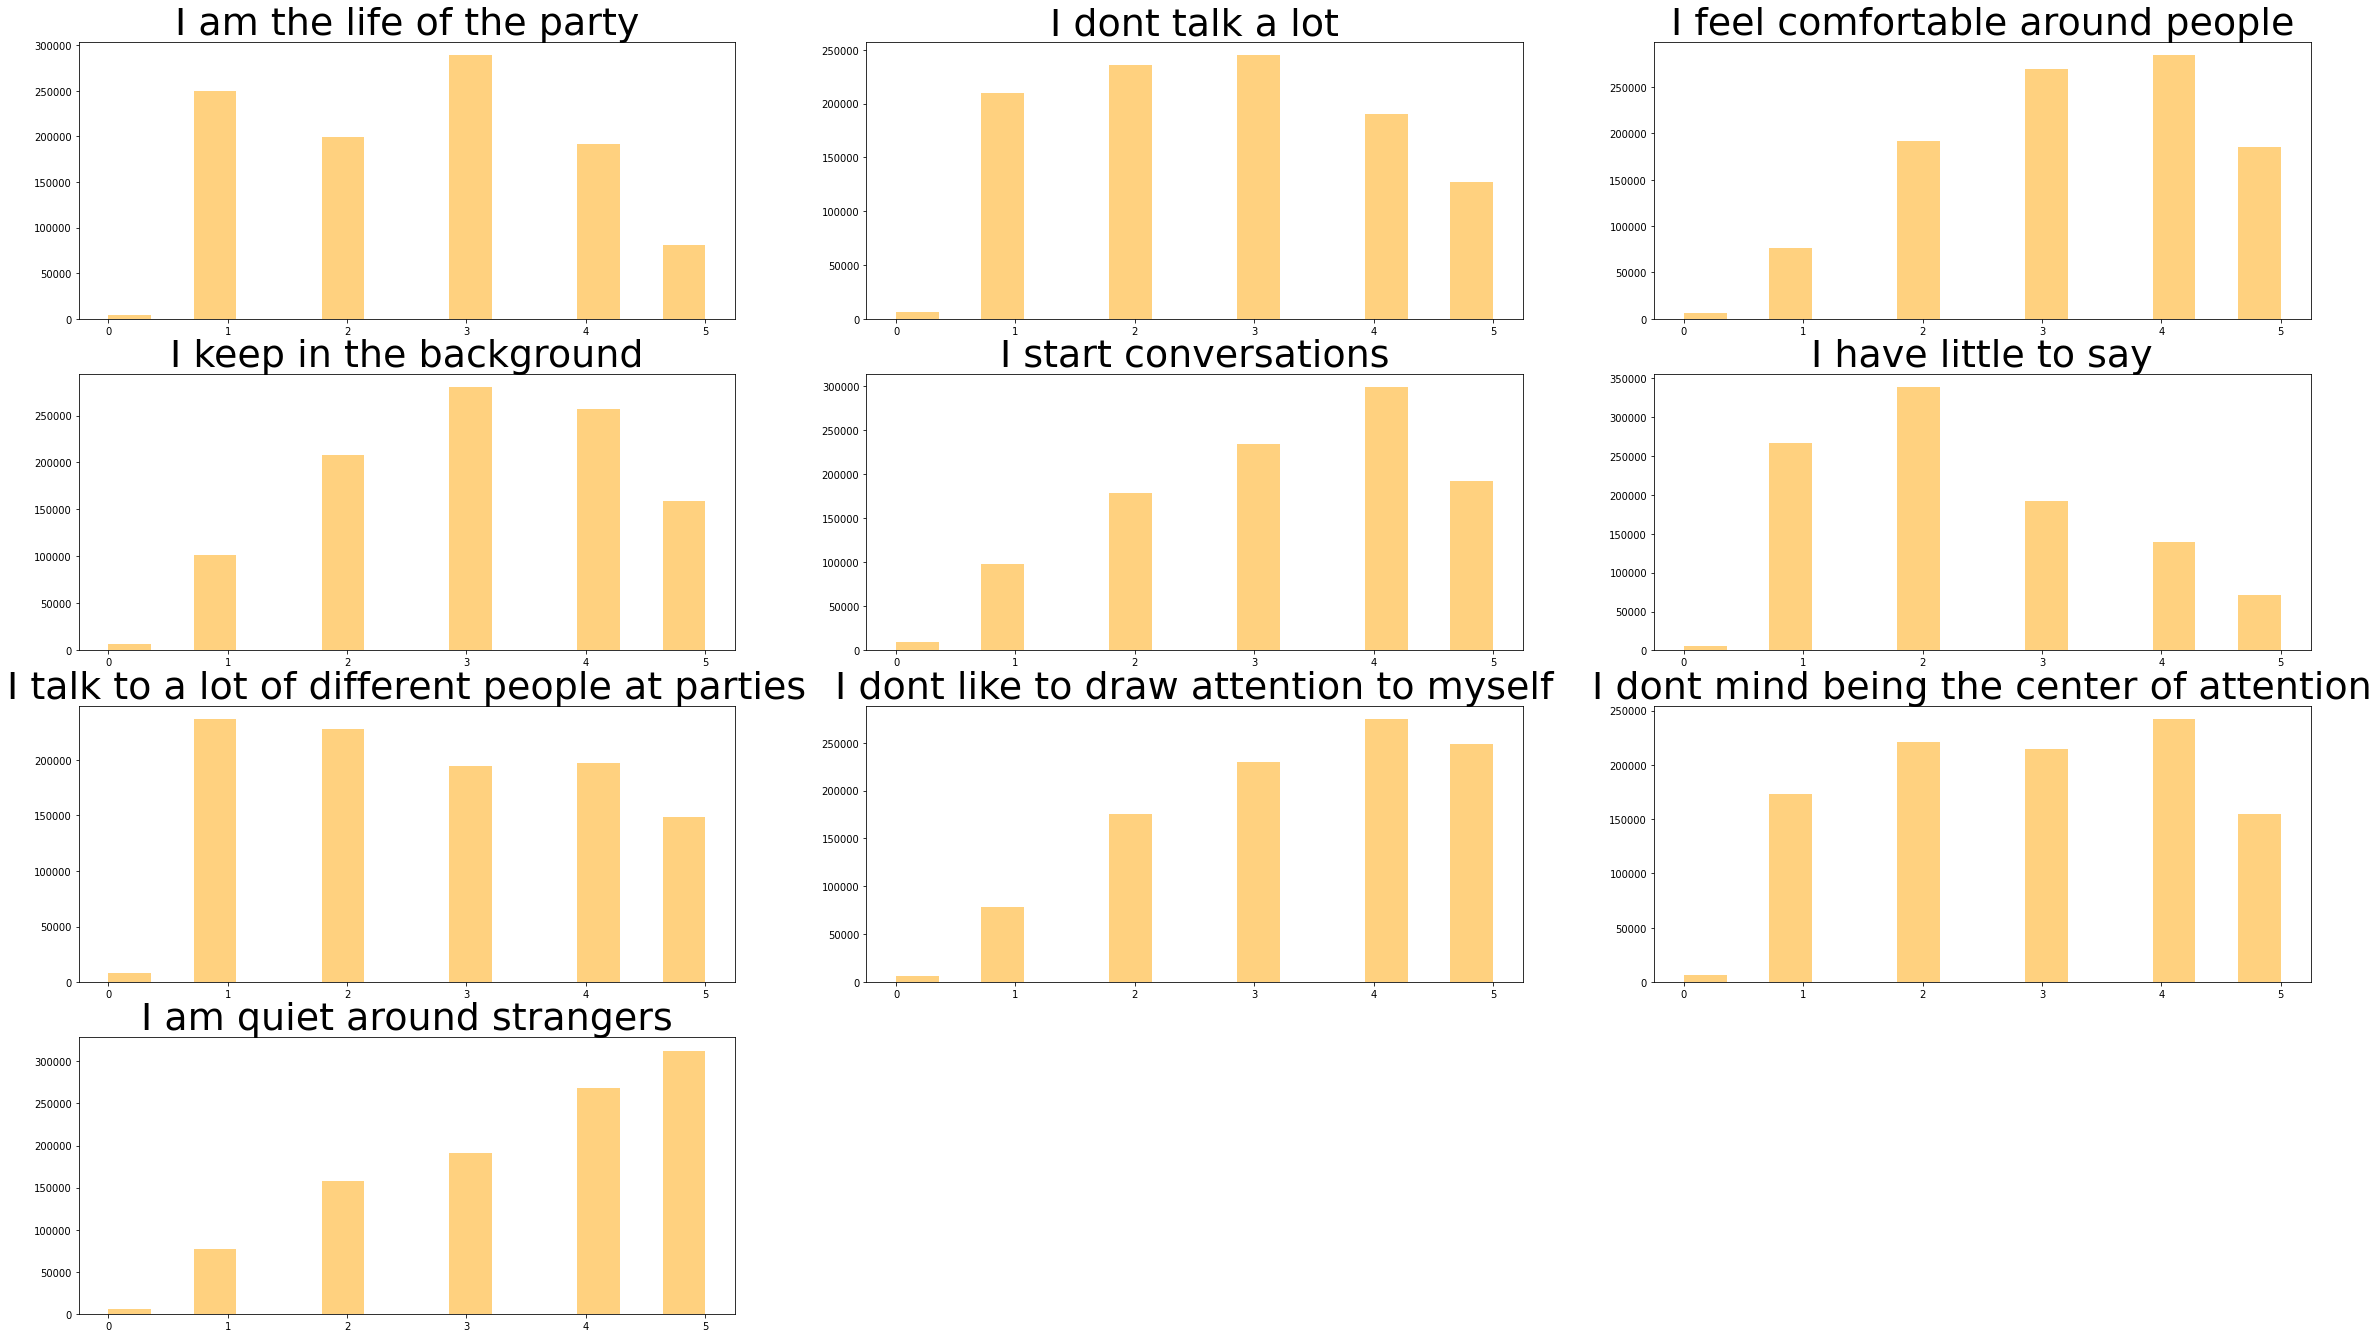

In [ ]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

In [ ]:
print('Q&As Related to Extroversion Personality')
df[EXT].describe()

Q&As Related to Extroversion Personality


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


Q&As Related to Extroversion Personality


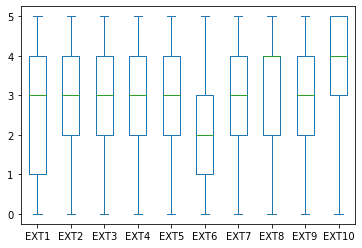

In [ ]:
print('Q&As Related to Extroversion Personality')
df[EXT].plot.box()

In [ ]:
data_EXT={'mean':df[EXT].mean(),
          'variance':df[EXT].var(),
          'skew':df[EXT].skew(),
          'kurtosis':df[EXT].kurt()}
data_EXT = pd.DataFrame(data_EXT)
data_EXT

,mean,variance,skew,kurtosis
EXT1,2.648067,1.598725,0.143964,-1.002670
EXT2,2.773115,1.752825,0.146970,-1.049290
EXT3,3.288349,1.476240,-0.284894,-0.730982
EXT4,3.140595,1.531263,-0.175846,-0.808640
EXT5,3.276960,1.632244,-0.370026,-0.765271
EXT6,2.401100,1.502392,0.551211,-0.618921
EXT7,2.771744,1.960941,0.149541,-1.201414
EXT8,3.414818,1.617769,-0.395229,-0.800006
EXT9,2.963740,1.811822,-0.045647,-1.125408
EXT10,3.556469,1.703631,-0.543527,-0.761214


Q&As Related to Agreeable Personality


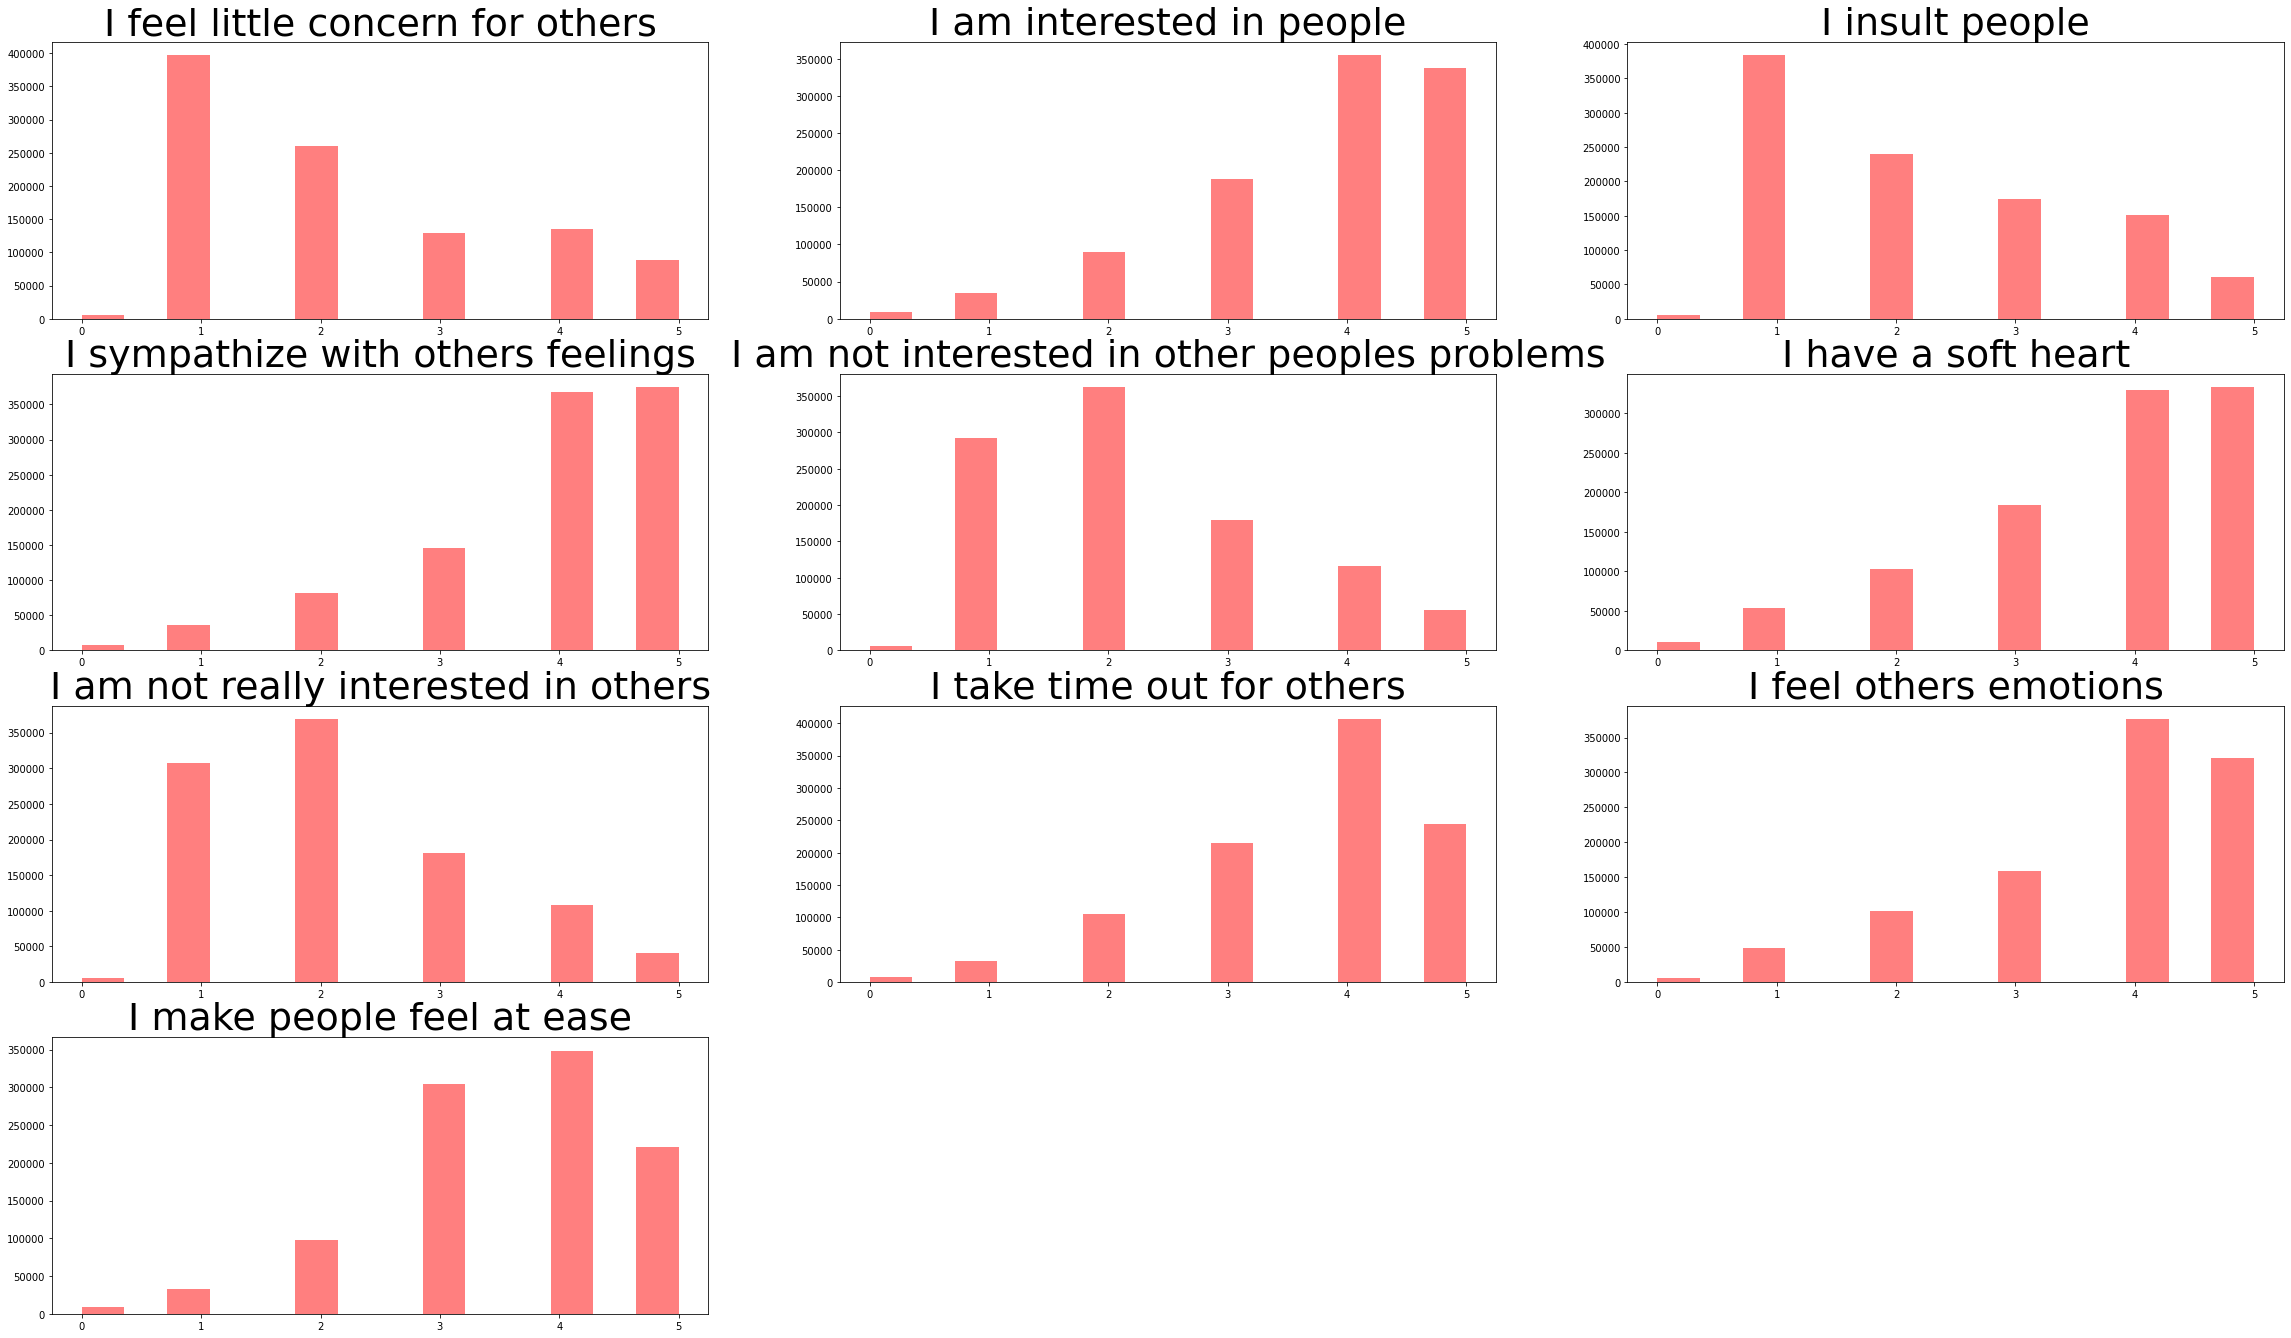

In [ ]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

In [ ]:
print('Q&As Related to Agreeable Personality')
df[AGR].describe()

Q&As Related to Agreeable Personality


,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06
mean,2.255316e+00,3.831103e+00,2.259957e+00,3.927497e+00,2.270857e+00,3.743075e+00,2.195806e+00,3.689389e+00,3.789116e+00,3.592351e+00
std,1.339971e+00,1.140587e+00,1.277323e+00,1.127688e+00,1.171207e+00,1.222431e+00,1.120320e+00,1.095536e+00,1.166743e+00,1.080791e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
50%,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,3.000000e+00,5.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


Q&As Related to Agreeable Personality


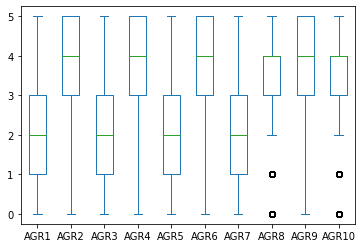

In [ ]:
print('Q&As Related to Agreeable Personality')
df[AGR].plot.box()

In [ ]:
data_AGR={'mean':df[AGR].mean(),
          'variance':df[AGR].var(),
          'skew':df[AGR].skew(),
          'kurtosis':df[AGR].kurt()}
data_AGR = pd.DataFrame(data_EXT)
data_AGR

,mean,variance,skew,kurtosis
EXT1,2.648067,1.598725,0.143964,-1.002670
EXT2,2.773115,1.752825,0.146970,-1.049290
EXT3,3.288349,1.476240,-0.284894,-0.730982
EXT4,3.140595,1.531263,-0.175846,-0.808640
EXT5,3.276960,1.632244,-0.370026,-0.765271
EXT6,2.401100,1.502392,0.551211,-0.618921
EXT7,2.771744,1.960941,0.149541,-1.201414
EXT8,3.414818,1.617769,-0.395229,-0.800006
EXT9,2.963740,1.811822,-0.045647,-1.125408
EXT10,3.556469,1.703631,-0.543527,-0.761214


Q&As Related to Neuroticism Personality


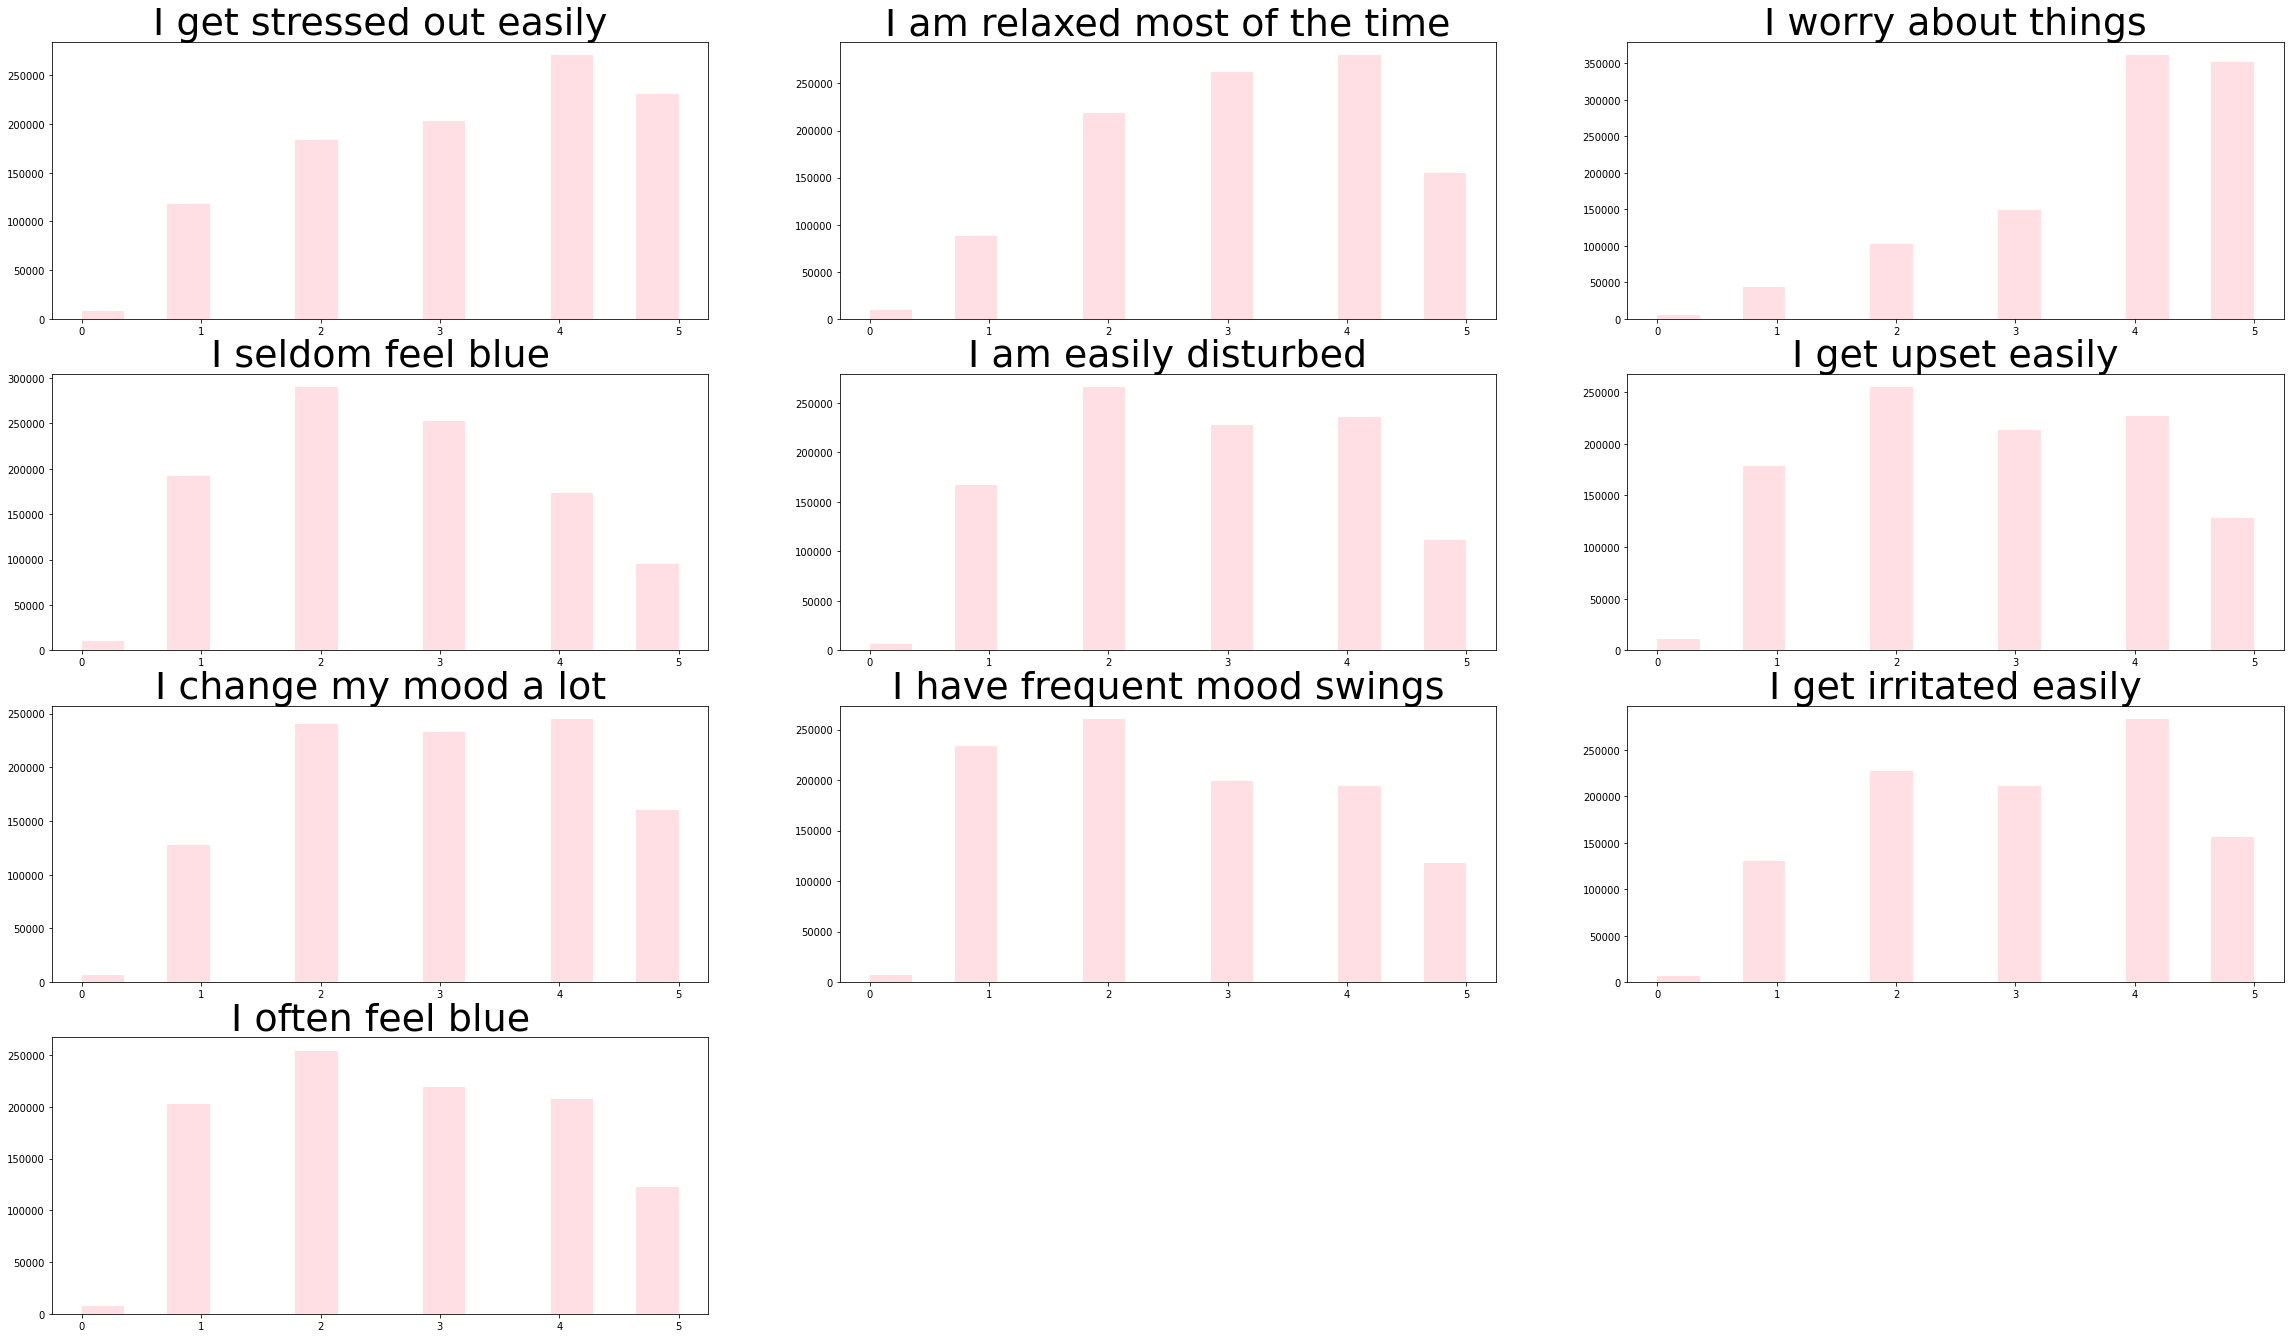

In [ ]:

print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

In [ ]:
print('Q&As Related to Neuroticism Personality')
df[EST].describe()

Q&As Related to Neuroticism Personality


,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06
mean,3.285969e+00,3.165072e+00,3.846466e+00,2.663756e+00,2.843086e+00,2.841154e+00,3.050394e+00,2.683485e+00,3.088511e+00,2.773504e+00
std,1.345600e+00,1.228272e+00,1.163348e+00,1.252999e+00,1.273892e+00,1.326569e+00,1.293009e+00,1.343042e+00,1.297141e+00,1.323155e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
50%,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
75%,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


Q&As Related to Neuroticism Personality


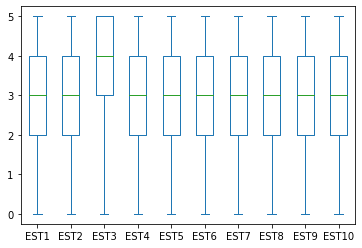

In [ ]:
print('Q&As Related to Neuroticism Personality')
df[EST].plot.box()

In [ ]:
data_EST={'mean':df[EST].mean(),
          'variance':df[EST].var(),
          'skew':df[EST].skew(),
          'kurtosis':df[EST].kurt()}
data_EST = pd.DataFrame(data_EST)
data_EST

,mean,variance,skew,kurtosis
EST1,3.285969,1.810638,-0.331012,-0.986589
EST2,3.165072,1.508651,-0.223362,-0.750691
EST3,3.846466,1.353378,-0.953697,0.223675
EST4,2.663756,1.570005,0.235186,-0.818002
EST5,2.843086,1.622801,0.066648,-1.017202
EST6,2.841154,1.759784,0.054949,-1.059479
EST7,3.050394,1.671873,-0.073351,-1.015526
EST8,2.683485,1.803761,0.233589,-1.088146
EST9,3.088511,1.682574,-0.162235,-1.028783
EST10,2.773504,1.750738,0.141354,-1.070867


Q&As Related to Conscientious Personality


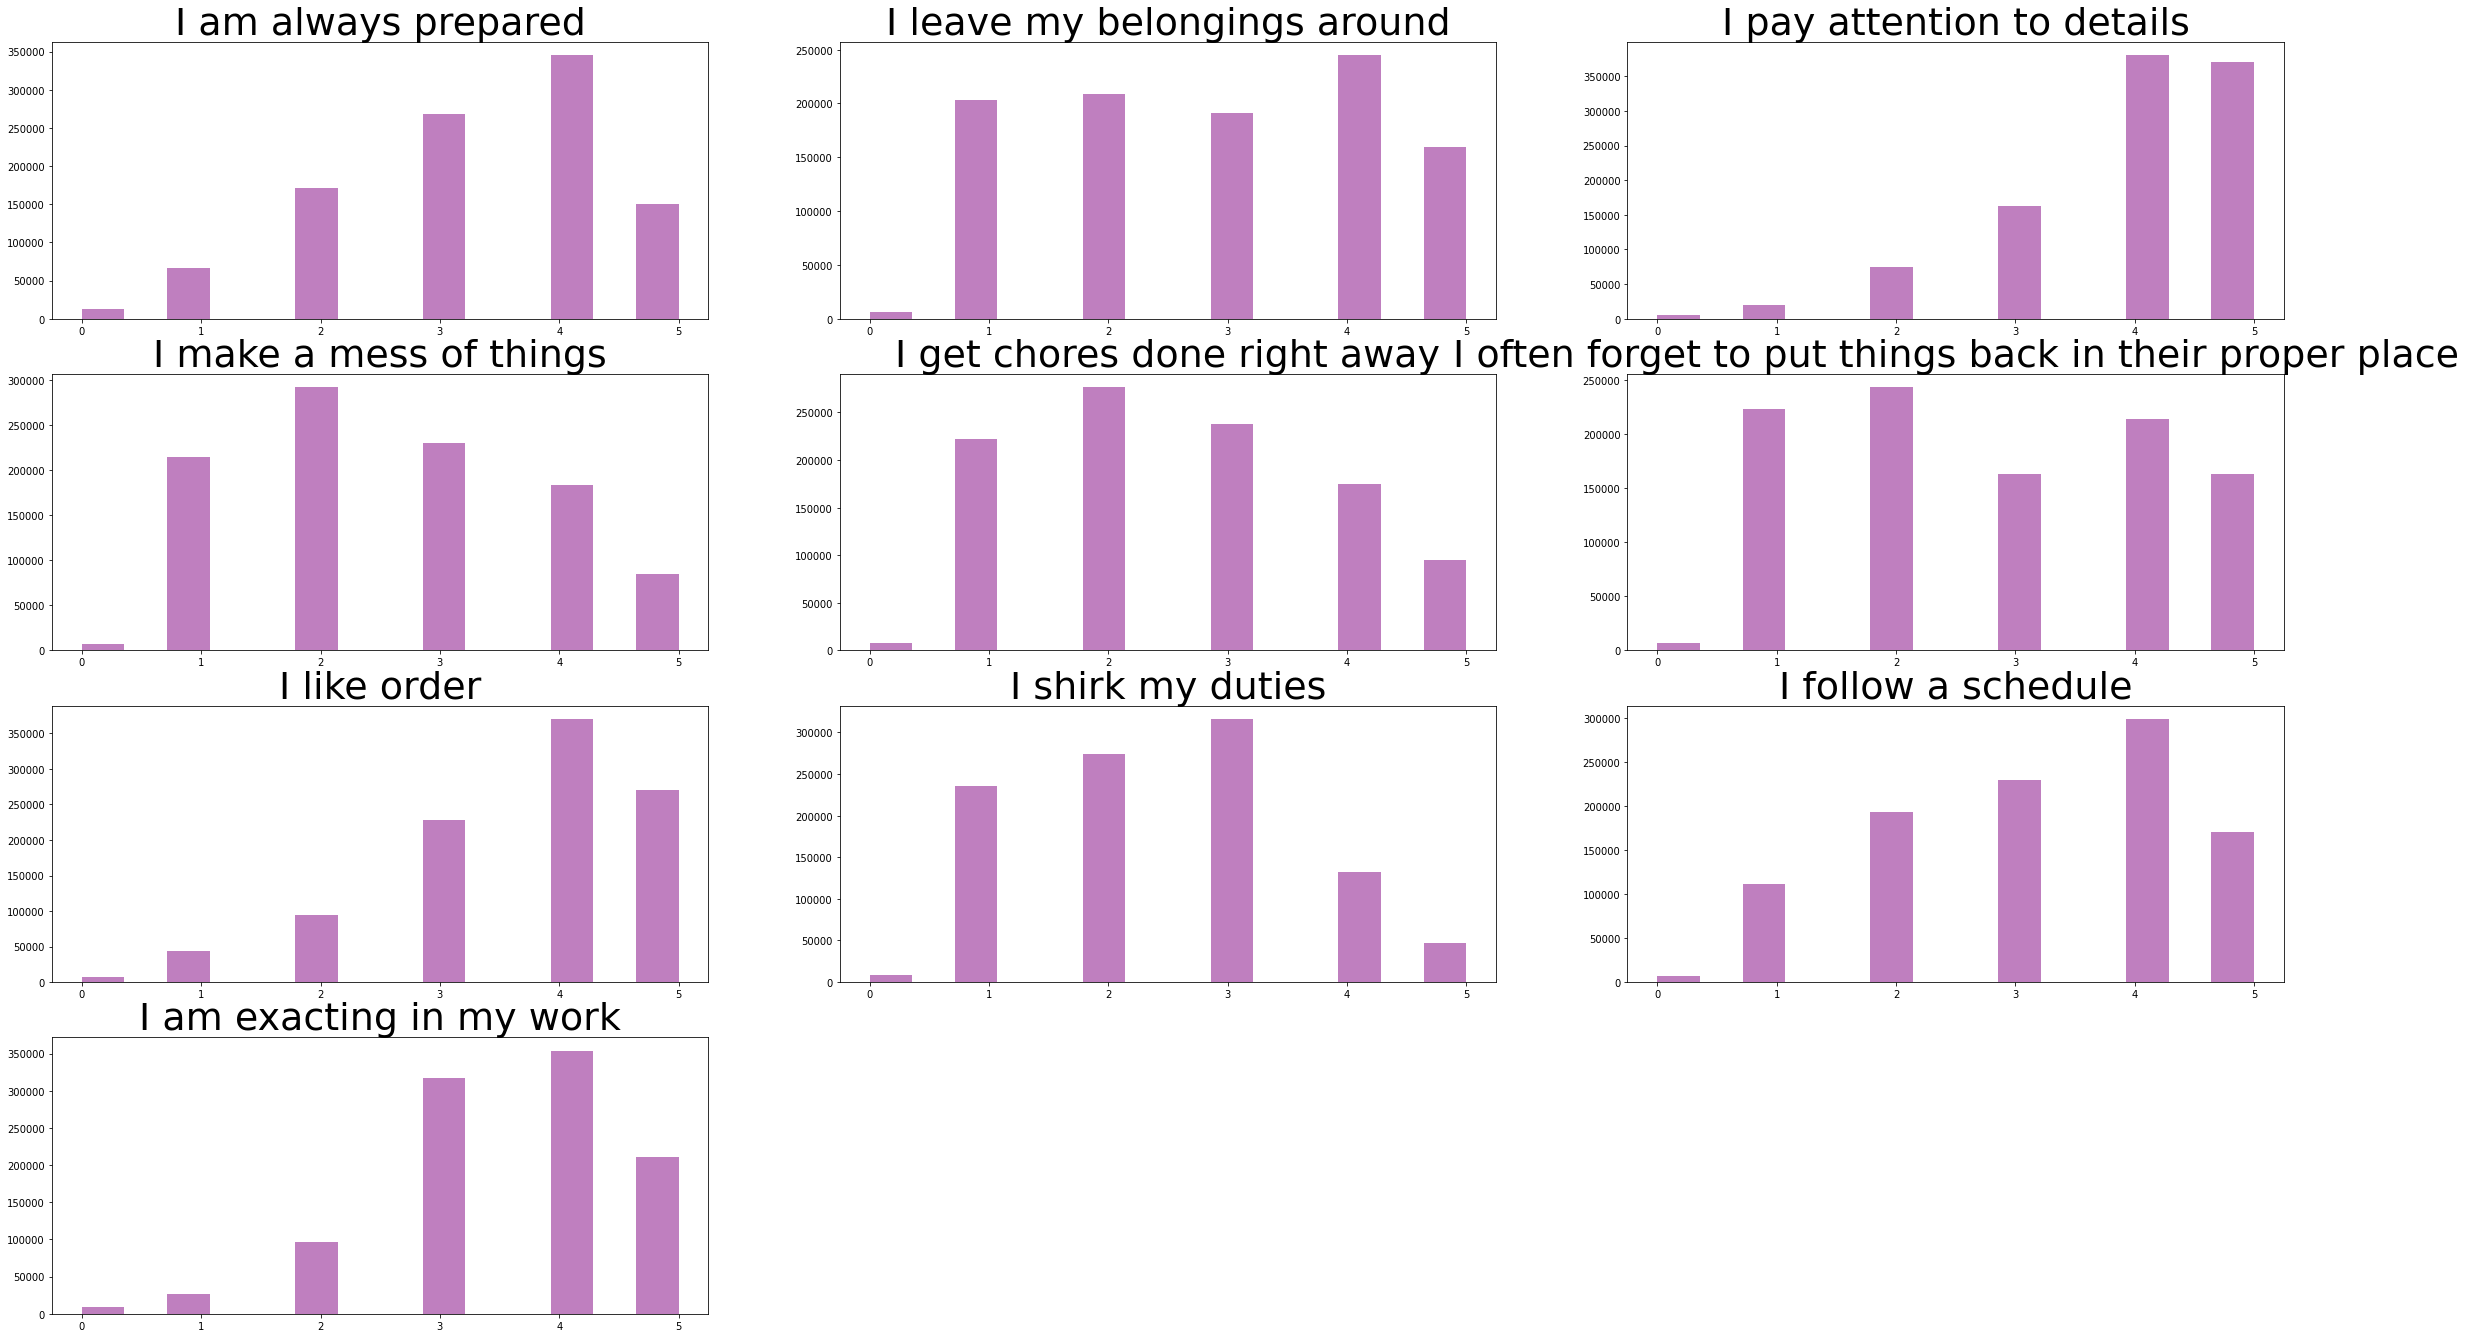

In [ ]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

In [ ]:
print('Q&As Related to Conscientious Personality')
df[CSN].describe()

Q&As Related to Conscientious Personality


,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06
mean,3.297999e+00,2.930295e+00,3.975280e+00,2.617866e+00,2.625832e+00,2.831821e+00,3.698187e+00,2.465306e+00,3.200695e+00,3.590596e+00
std,1.176791e+00,1.390062e+00,1.044728e+00,1.251815e+00,1.274595e+00,1.416194e+00,1.128066e+00,1.140957e+00,1.276230e+00,1.053185e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
50%,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
75%,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


Q&As Related to Conscientious Personality


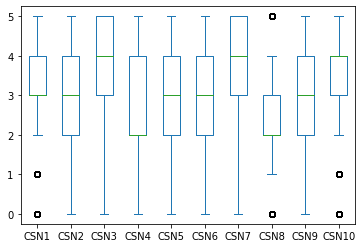

In [ ]:
print('Q&As Related to Conscientious Personality')
df[CSN].plot.box()

In [ ]:
data_CSN={'mean':df[CSN].mean(),
          'variance':df[CSN].var(),
          'skew':df[CSN].skew(),
          'kurtosis':df[CSN].kurt()}
data_CSN = pd.DataFrame(data_CSN)
data_CSN

,mean,variance,skew,kurtosis
CSN1,3.297999,1.384838,-0.469507,-0.354641
CSN2,2.930295,1.932272,-0.028220,-1.228279
CSN3,3.975280,1.091457,-1.065694,0.946830
CSN4,2.617866,1.567040,0.276751,-0.890384
CSN5,2.625832,1.624593,0.273321,-0.903078
CSN6,2.831821,2.005605,0.117082,-1.269801
CSN7,3.698187,1.272533,-0.792030,0.212542
CSN8,2.465306,1.301783,0.269617,-0.610404
CSN9,3.200695,1.628764,-0.294035,-0.871765
CSN10,3.590596,1.109199,-0.600131,0.331650


Q&As Related to Open Personality


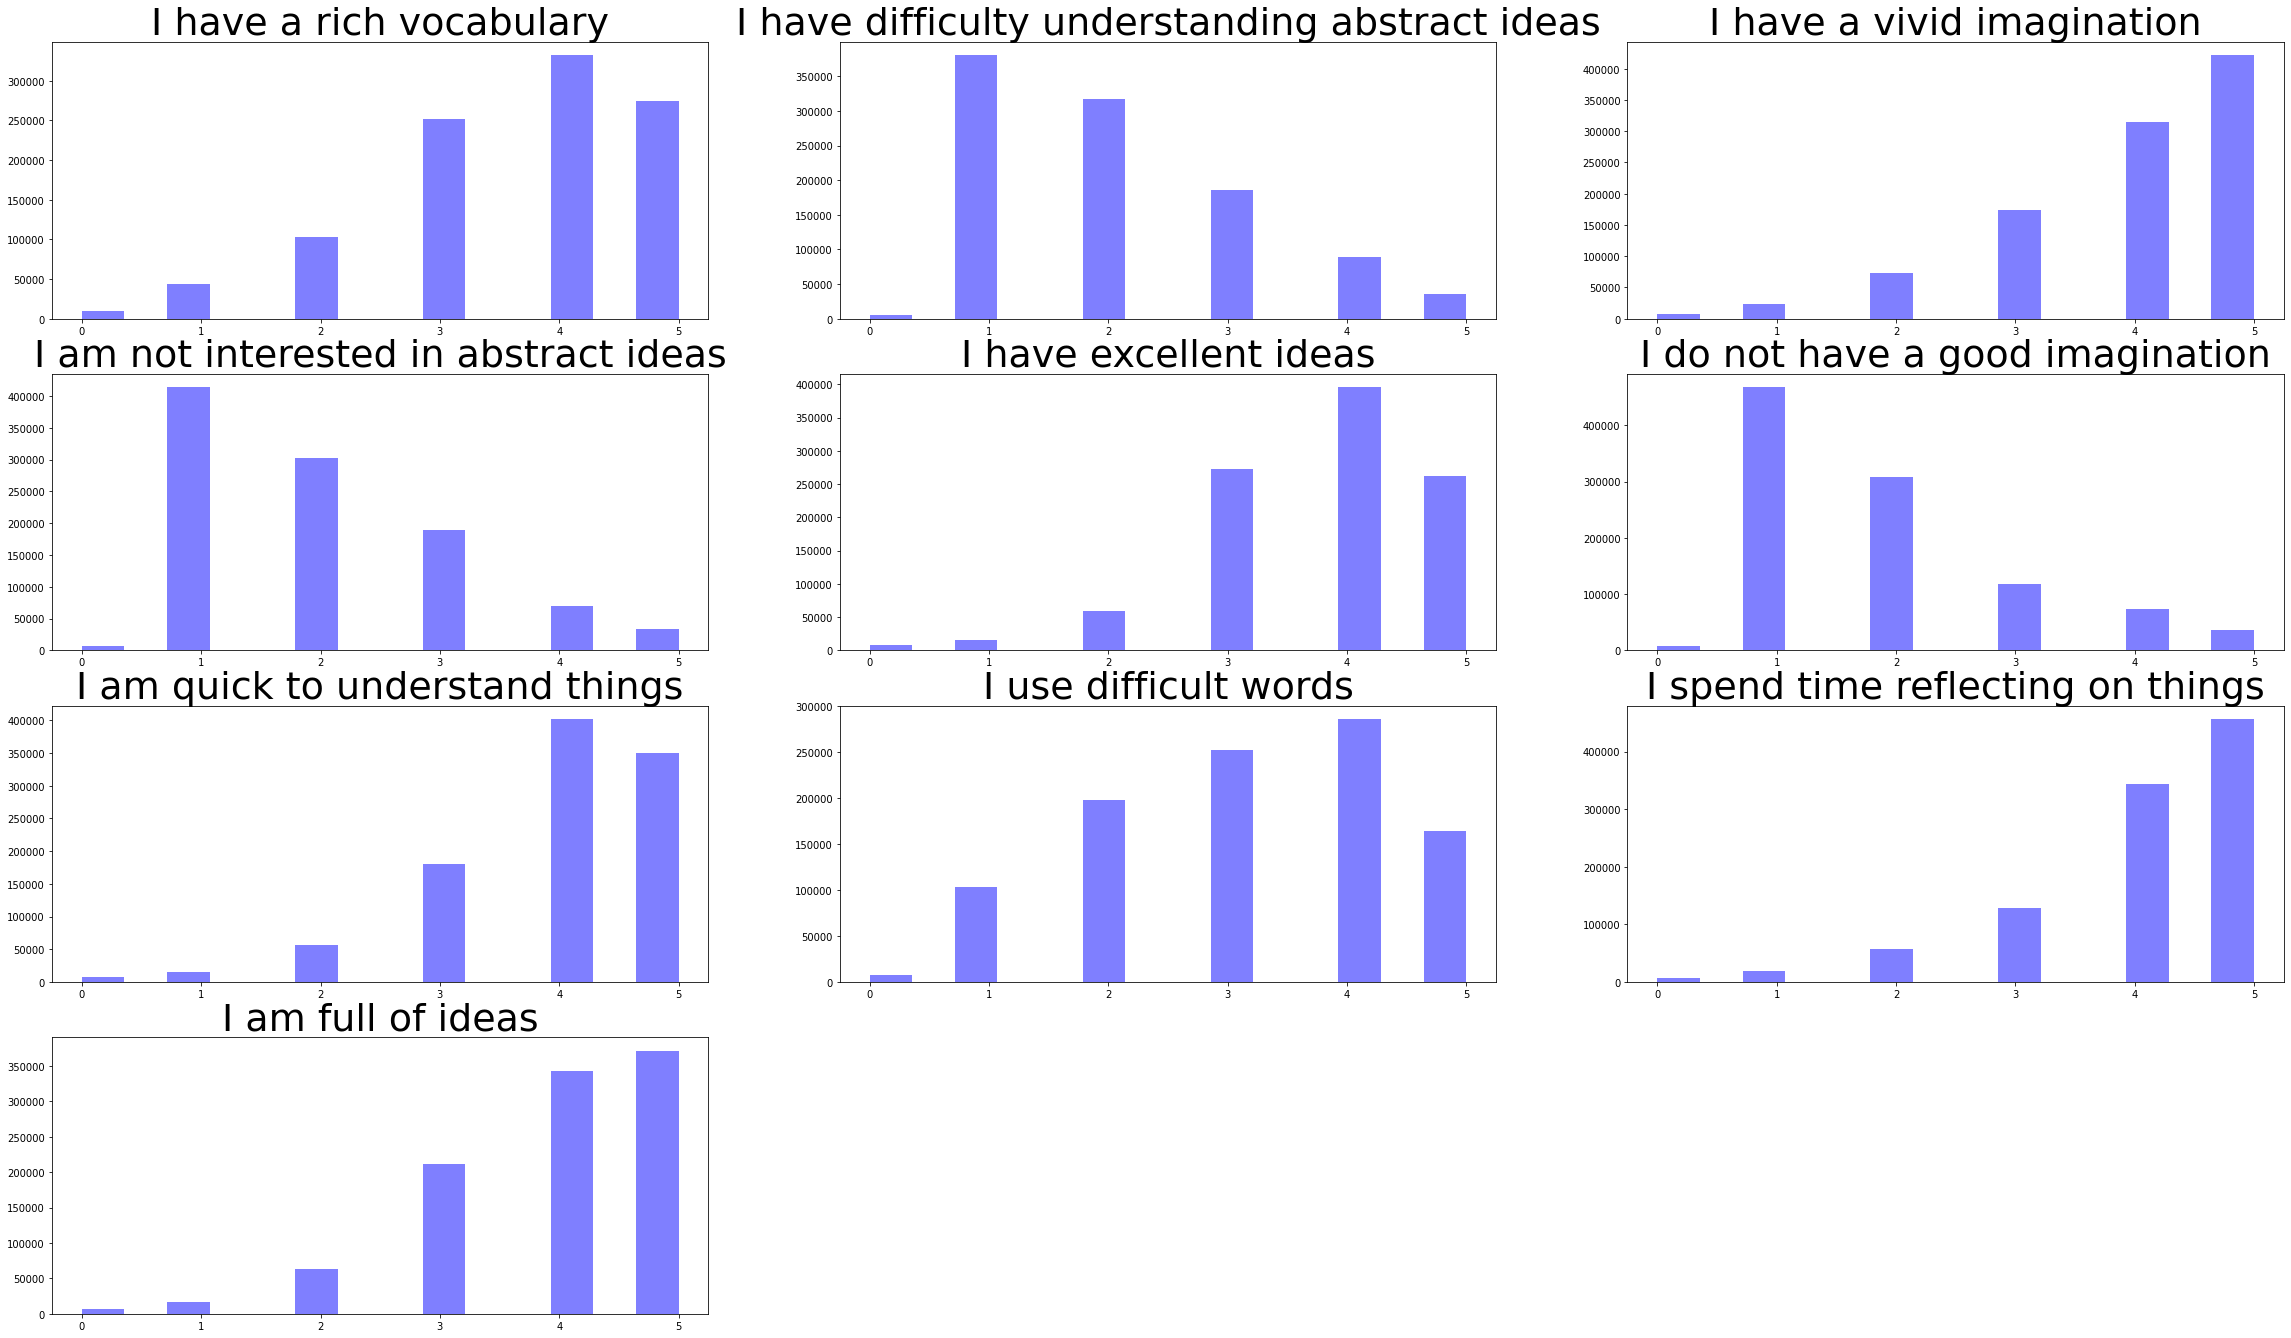

In [ ]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

In [ ]:
print('Q&As Related to Open Personality')
df[OPN].describe()

Q&As Related to Open Personality


,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06
mean,3.654636e+00,2.075933e+00,4.000068e+00,1.999891e+00,3.792905e+00,1.894605e+00,3.976375e+00,3.182453e+00,4.122993e+00,3.958441e+00
std,1.157155e+00,1.112600e+00,1.097169e+00,1.090239e+00,9.923859e-01,1.104125e+00,1.008505e+00,1.255374e+00,1.041216e+00,1.034491e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00
50%,4.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00
75%,5.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


Q&As Related to Open Personality


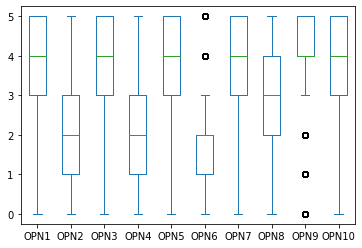

In [ ]:
print('Q&As Related to Open Personality')
df[OPN].plot.box()

In [ ]:
df[OPN].mode()

,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,1.0,4.0,1.0,4.0,4.0,5.0,5.0


In [ ]:
df[EXT].mode()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
0,3.0,3.0,4.0,3.0,4.0,2.0,1.0,4.0,4.0,5.0


In [ ]:
df[EST].mode()

,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10
0,4.0,4.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,2.0


In [ ]:
df[AGR].mode()

,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10
0,1.0,4.0,1.0,5.0,2.0,5.0,2.0,4.0,4.0,4.0


In [ ]:
df[CSN].mode()

,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10
0,4.0,4.0,4.0,2.0,2.0,2.0,4.0,3.0,4.0,4.0


In [ ]:
df[OPN].mean().mean()

3.2658302731565434

In [ ]:
df[EXT].mean().mean()

3.0234955473687743

In [ ]:
df[EST].mean().mean()

3.0241396150984943

In [ ]:
df[AGR].mean().mean()

3.1554468515861944

In [ ]:
df[CSN].mean().mean()

3.1233877094354736

In [ ]:
df[OPN].std().mean()

1.0893260804343456

In [ ]:
df[CSN].std().mean()

1.2152623910004257

In [ ]:
df[AGR].std().mean()

1.1742598148759529

In [ ]:
df[EST].std().mean()

1.2847024427360008

In [ ]:
df[EXT].std().mean()

1.2867635636213968

# Correlation

Citation: https://www.kaggle.com/code/psqrtpsqrt/big-five-personality-test-eda/notebook#Exploratory-Data-Analysis

In [ ]:
import numpy as np
np.random.seed(0)


In [ ]:
frames_EXT = [df['EXT1'],df['EXT2'],df['EXT3'],df ['EXT4'],df ['EXT5'],df ['EXT6'],df ['EXT7'],df ['EXT8'],df ['EXT9'],df ['EXT10']]
frames_EST = [df['EST1'],df['EST2'],df['EST3'],df ['EST4'],df ['EST5'],df ['EST6'],df ['EST7'],df ['EST8'],df ['EST9'],df ['EST10']]
frames_AGR = [df['AGR1'],df['AGR2'],df['AGR3'],df ['AGR4'],df ['AGR5'],df ['AGR6'],df ['AGR7'],df ['AGR8'],df ['AGR9'],df ['AGR10']]
frames_OPN = [df['OPN1'],df['OPN2'],df['OPN3'],df ['OPN4'],df ['OPN5'],df ['OPN6'],df ['OPN7'],df ['OPN8'],df ['OPN9'],df ['OPN10']]
frames_CSN = [df['CSN1'],df['CSN2'],df['CSN3'],df ['CSN4'],df ['CSN5'],df ['CSN6'],df ['CSN7'],df ['CSN8'],df ['CSN9'],df ['CSN10']]

In [ ]:
data_group={'EST': pd.concat(frames_EST),
          'EXT': pd.concat(frames_EXT),
          'AGR': pd.concat(frames_AGR),
          'CSN': pd.concat(frames_CSN),
          'OPN': pd.concat(frames_OPN)}
data_group = pd.DataFrame(data_group)
data_group

,EST,EXT,AGR,CSN,OPN
0,1.0,4.0,2.0,3.0,5.0
1,2.0,3.0,1.0,3.0,1.0
2,4.0,2.0,1.0,4.0,5.0
3,3.0,2.0,2.0,2.0,4.0
4,1.0,3.0,1.0,5.0,5.0
...,...,...,...,...,...
1015336,3.0,3.0,4.0,3.0,4.0
1015337,5.0,3.0,3.0,3.0,4.0
1015338,1.0,4.0,5.0,4.0,5.0
1015339,4.0,4.0,3.0,4.0,3.0


In [ ]:
personality_traits = ["EXT","AGR","CSN","EST","OPN"]
answer_columns = [trait + str(number) for trait in personality_traits for number in range(1, 11)]
print(answer_columns)

['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']


In [ ]:
df[answer_columns] = df[answer_columns].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
correlation = data_group.corr()
print(correlation)

          EST       EXT       AGR       CSN       OPN
EST  1.000000 -0.008883 -0.045825  0.101542  0.080885
EXT -0.008883  1.000000 -0.063661  0.045185  0.114387
AGR -0.045825 -0.063661  1.000000 -0.067535 -0.184028
CSN  0.101542  0.045185 -0.067535  1.000000  0.199078
OPN  0.080885  0.114387 -0.184028  0.199078  1.000000


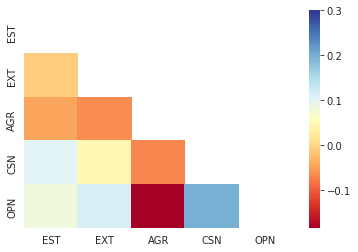

In [ ]:
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(correlation, mask = mask, vmax = .3, cmap = "RdYlBu")
plt.show()

# Pivot
Citation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html

In [ ]:
pivot=data_group.pivot_table(index='EXT', aggfunc={'EST':'sum','AGR':'sum','CSN':'sum','OPN':'sum'})
pivot 
#kalau EXT 0, maka di AGR ada brp sum nya

,AGR,CSN,EST,OPN
EXT,,,,
0.0,83041.0,87872.0,87058.0,94532.0
1.0,5267572.0,4910376.0,4904064.0,4853962.0
2.0,7041753.0,6583910.0,6492436.0,6742388.0
3.0,7329863.0,7291301.0,7114308.0,7599267.0
4.0,7144016.0,7351617.0,6985037.0,7947591.0
5.0,5116039.0,5432270.0,5068506.0,5863344.0


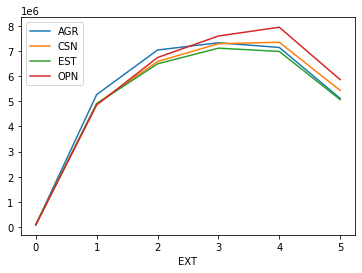

In [ ]:
pivot.plot()

In [ ]:
pivot_median=data_group.pivot_table(index='EXT', aggfunc={'EST':np.median,'AGR':np.median,'CSN':np.median,'OPN':np.median})
pivot_median

,AGR,CSN,EST,OPN
EXT,,,,
0.0,0.0,0.0,0.0,0.0
1.0,4.0,3.0,3.0,3.0
2.0,4.0,3.0,3.0,3.0
3.0,3.0,3.0,3.0,3.0
4.0,3.0,3.0,3.0,4.0
5.0,3.0,3.0,3.0,4.0


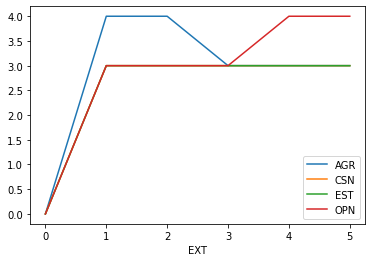

In [ ]:
pivot_median.plot()

In [ ]:
contigency_pct = pd.crosstab(data_group['EXT'], data_group['EST'])
contigency_pct

EST,0.0,1.0,2.0,3.0,4.0,5.0
EXT,,,,,,
0.0,37917,4390,6103,6532,6464,5002
1.0,7276,265891,292897,302845,353751,345768
2.0,8223,268036,535134,442336,576521,304208
3.0,9710,305586,524125,587483,565307,347359
4.0,8032,313177,608351,498859,623089,293245
5.0,6545,324816,330699,332316,352591,334996


# Chi-square

Citation: https://pythonfordatascienceorg.wordpress.com/chi-square-python/

In [ ]:
from scipy import stats

In [ ]:
from scipy.stats import chi2_contingency


In [ ]:
contigency= pd.crosstab(df['EXT1'], df['EST1']) 
contigency

EST1,0,1,2,3,4,5
EXT1,,,,,,
0,2486,196,200,271,289,278
1,1298,26262,36525,43445,65270,76911
2,801,18832,37817,39471,60651,41593
3,1615,33622,54976,62989,77185,58235
4,961,24157,40587,40692,50202,35039
5,638,14715,13071,16735,16808,18735


In [ ]:
contigency_pct = pd.crosstab(df['EXT1'], df['EST1'], normalize='index')
contigency_pct

EST1,0,1,2,3,4,5
EXT1,,,,,,
0,0.668280,0.052688,0.053763,0.072849,0.077688,0.074731
1,0.005198,0.105170,0.146269,0.173981,0.261382,0.308000
2,0.004022,0.094555,0.189878,0.198182,0.304526,0.208837
3,0.005596,0.116491,0.190478,0.218240,0.267426,0.201769
4,0.005015,0.126055,0.211790,0.212338,0.261963,0.182840
5,0.007906,0.182337,0.161966,0.207368,0.208272,0.232150


In [ ]:
crosstab = pd.crosstab(data_group['OPN'], data_group['EST'])
crosstab
stats.chi2_contingency(crosstab) 

(2961465.9952347083,
 0.0,
 25,
 array([[5.79308455e+02, 1.10481562e+04, 1.71274021e+04, 1.61810261e+04,
         1.84724642e+04, 1.21566429e+04],
        [1.15090225e+04, 2.19491840e+05, 3.40267185e+05, 3.21465693e+05,
         3.66989303e+05, 2.41513956e+05],
        [1.17849195e+04, 2.24753549e+05, 3.48424148e+05, 3.29171943e+05,
         3.75786856e+05, 2.47303585e+05],
        [1.50760799e+04, 2.87520206e+05, 4.45728146e+05, 4.21099400e+05,
         4.80732405e+05, 3.16367763e+05],
        [2.03106395e+04, 3.87349980e+05, 6.00489235e+05, 5.67309152e+05,
         6.47647308e+05, 4.26213686e+05],
        [1.84430300e+04, 3.51732268e+05, 5.45272884e+05, 5.15143785e+05,
         5.88094665e+05, 3.87022368e+05]]))

In [ ]:
crosstab = pd.crosstab(data_group['AGR'], data_group['EXT'])
crosstab
stats.chi2_contingency(crosstab) 

(3296101.3165667094,
 0.0,
 25,
 array([[4.78673708e+02, 1.13053434e+04, 1.53853290e+04, 1.68637912e+04,
         1.69011507e+04, 1.21237120e+04],
        [1.06186049e+04, 2.50790826e+05, 3.41298730e+05, 3.74096033e+05,
         3.74924792e+05, 2.68945014e+05],
        [1.18612053e+04, 2.80138636e+05, 3.81237872e+05, 4.17873150e+05,
         4.18798891e+05, 3.00417246e+05],
        [1.21972165e+04, 2.88074567e+05, 3.92037801e+05, 4.29710904e+05,
         4.30662871e+05, 3.08927641e+05],
        [1.76472486e+04, 4.16793743e+05, 5.67210442e+05, 6.21716863e+05,
         6.23094193e+05, 4.46964511e+05],
        [1.36050510e+04, 3.21324885e+05, 4.37287827e+05, 4.79309258e+05,
         4.80371103e+05, 3.44584876e+05]]))

In [ ]:
def chi2_table(series1, series2, to_csv = False, csv_name = None, 
                prop= False):
    
    if type(series1) != list:
        crosstab = pd.crosstab(series1, series2)
        crosstab2 = pd.crosstab(series1, series2, margins= True)
        crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
        crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        
        if prop == False:
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                                             
                file = open(csv_name, 'a')
                file.write(f"{crosstab2.columns.name}\n")
                file.close()
                crosstab2.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()              
                
        if prop == 'Row':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                
                file = open(csv_name, 'a')
                file.write(f"{crosstab_proprow.columns.name}\n")
                file.close()
                crosstab_proprow.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

        if prop == 'Col':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")

            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                    
                file = open(csv_name, 'a')
                file.write(f"{crosstab_propcol.columns.name}\n")
                file.close()
                crosstab_propcol.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

    elif type(series1) == list and type(series2) == list:
        for entry2 in series2:
            for entry1 in series1:
                crosstab = pd.crosstab(entry1, entry2)
                crosstab2 = pd.crosstab(entry1, entry2, margins= True)
                crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
                crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
                chi2, p, dof, expected = stats.chi2_contingency(crosstab)
                
                if prop == False:
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab2.columns.name}\n")
                        file.close()
                        crosstab2.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()                        

                if prop == 'Row':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_proprow.columns.name}\n")
                        file.close()
                        crosstab_proprow.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()
                    
                if prop == 'Col':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_propcol.columns.name}\n")
                        file.close()
                        crosstab_propcol.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()


    elif type(series1) == list:
        for entry in series1:
            crosstab = pd.crosstab(entry, series2)
            crosstab2 = pd.crosstab(entry, series2, margins= True)
            crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
            crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
            chi2, p, dof, expected = stats.chi2_contingency(crosstab)
            
            if prop == False:
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab2.columns.name}\n")
                    file.close()
                    crosstab2.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Row':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_proprow.columns.name}\n")
                    file.close()
                    crosstab_proprow.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Col':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_propcol.columns.name}\n")
                    file.close()
                    crosstab_propcol.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

In [ ]:
chi2_table(data_group['AGR'], data_group['EXT'])


 Chi-Square test between AGR and EXT 
 
 EXT    0.0      1.0      2.0      3.0      4.0      5.0       All
AGR                                                              
0.0  38078     4917     7060     8062     7765     7176     73058
1.0   5221   251468   252551   353671   379501   378262   1620674
2.0   6351   225714   381918   439814   497932   258598   1810327
3.0   6269   257119   378494   466812   430892   322025   1861611
4.0   6134   352731   682291   659927   667340   325004   2693427
5.0   4355   476479   432144   411284   361323   390898   2076483
All  66408  1568428  2134458  2339570  2344753  1681963  10135580 
 
 Pearson Chi2(25)= 3296101.3166 p-value= 0.0000


In [ ]:
chi2_table(data_group['AGR'], data_group['EXT'], prop= 'Row')


 Chi-Square test between AGR and EXT 
 
 EXT    0.0    1.0    2.0    3.0    4.0    5.0    All
AGR                                                 
0.0  52.12   6.73   9.66  11.04  10.63   9.82  100.0
1.0   0.32  15.52  15.58  21.82  23.42  23.34  100.0
2.0   0.35  12.47  21.10  24.29  27.51  14.28  100.0
3.0   0.34  13.81  20.33  25.08  23.15  17.30  100.0
4.0   0.23  13.10  25.33  24.50  24.78  12.07  100.0
5.0   0.21  22.95  20.81  19.81  17.40  18.83  100.0
All   0.66  15.47  21.06  23.08  23.13  16.59  100.0 
 
 Pearson Chi2(25)= 3296101.3166 p-value= 0.0000


In [ ]:
chi2_table(data_group['AGR'], data_group['EXT'], prop= 'Col')


 Chi-Square test between AGR and EXT 
 
 EXT     0.0     1.0     2.0     3.0     4.0     5.0     All
AGR                                                        
0.0   57.34    0.31    0.33    0.34    0.33    0.43    0.72
1.0    7.86   16.03   11.83   15.12   16.19   22.49   15.99
2.0    9.56   14.39   17.89   18.80   21.24   15.37   17.86
3.0    9.44   16.39   17.73   19.95   18.38   19.15   18.37
4.0    9.24   22.49   31.97   28.21   28.46   19.32   26.57
5.0    6.56   30.38   20.25   17.58   15.41   23.24   20.49
All  100.00  100.00  100.00  100.00  100.00  100.00  100.00 
 
 Pearson Chi2(25)= 3296101.3166 p-value= 0.0000


In [ ]:
df_model = df.drop(df.columns[50:110], axis=1)
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,...,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,...,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,...,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,...,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,...,5,1,5,1,5,1,5,3,5,5


# Clustering

Citation: https://www.kaggle.com/code/aryansakhala/five-personality-clusters/notebook

In [ ]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [ ]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4,1,5,2,5,...,5,3,4,5,1
1,3,5,3,4,3,...,4,2,5,3,3
2,2,3,4,4,3,...,5,3,4,4,3
3,2,2,2,3,4,...,4,4,3,3,4
4,3,3,3,3,5,...,5,3,5,5,1


In [ ]:
df_model.Clusters.value_counts()

2    226964
3    212638
1    210355
0    199866
4    163735
Name: Clusters, dtype: int64

In [ ]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.808677,3.629107,2.229704,4.054271,2.281609,3.196056,1.742327,4.067850,2.176633,4.474128,4.248031,2.460459,4.501891,2.146638,3.557398,3.857735,3.988497,3.759044,4.006324,3.930463,2.503873,3.327414,2.607242,3.800016,2.589705,3.819279,2.746385,3.404221,3.640864,3.043054,2.803999,3.356009,3.811048,3.476854,2.092157,3.500505,3.559280,3.046231,2.775810,3.306595,3.499084,2.383792,4.060571,2.139594,3.431799,2.089130,3.676924,3.177484,4.274314,3.720633
1,3.472368,1.942716,4.338556,2.218502,4.264943,1.666012,3.886511,2.809460,3.742754,2.514530,2.326757,3.818531,3.158727,3.280616,2.116860,1.902817,2.112938,1.678586,2.118856,1.720159,1.891792,4.432607,1.829645,4.249169,1.855297,3.849488,1.586775,4.098709,4.102327,4.195294,3.717459,2.577605,4.192646,1.896603,3.141513,2.278567,3.871936,1.934611,3.583542,3.875696,3.884091,1.755442,4.082175,1.795807,4.157553,1.654988,4.313641,3.233810,4.096323,4.294669
2,3.446322,1.918798,3.788323,2.511063,4.037187,1.835168,3.647808,2.772431,3.759226,3.006851,3.812878,2.925786,4.244739,2.412096,3.287632,3.468700,3.807921,3.458557,3.657629,3.176482,2.159373,4.271052,2.654452,4.183364,2.001771,3.999136,1.859211,3.897015,4.131351,3.843715,2.957465,3.603761,3.841614,3.236531,2.236126,3.521862,3.459822,2.828268,2.946881,3.479354,3.738289,2.118451,4.246982,1.967114,3.956134,1.772493,3.961509,3.373980,4.189973,4.199692
3,2.117077,3.313110,3.086748,3.669640,2.949699,2.712290,2.197279,4.006429,2.320164,4.139933,3.499177,3.082854,4.150716,2.608306,2.817996,2.784258,2.864775,2.426504,2.970330,2.709337,1.887005,3.932660,1.692012,4.349495,1.990900,4.141249,2.020340,3.979505,4.170605,3.716307,3.833492,2.233768,4.297473,2.022818,3.233909,2.080179,4.163146,2.018115,3.828135,3.890471,3.576534,2.135385,3.895386,2.060953,3.727824,1.966041,4.010802,2.987199,4.266345,3.815287
4,2.196745,3.278022,2.800134,3.395517,2.593868,2.755452,2.127816,3.517550,2.656830,3.779058,2.336666,3.624118,2.982771,2.923340,2.320524,2.009760,2.300657,1.920964,2.578496,2.239240,3.030250,2.931438,2.579613,2.767136,3.152099,2.641305,3.000623,2.847052,2.597869,2.978832,3.138724,2.834776,3.663358,2.411152,2.365267,2.745986,3.371112,2.515620,2.764473,3.335750,3.535200,1.975741,3.614414,2.057691,3.623477,2.041494,3.884509,3.110624,3.693535,3.668263


In [ ]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.966036,3.645648,3.148205,3.172849,3.245332
1,3.085635,2.423485,3.209110,3.107018,3.326850
2,3.072318,3.425242,3.300044,3.211168,3.352462
3,3.051237,2.991425,3.188008,3.160151,3.244176
4,2.910099,2.523653,2.852622,2.914622,3.120495


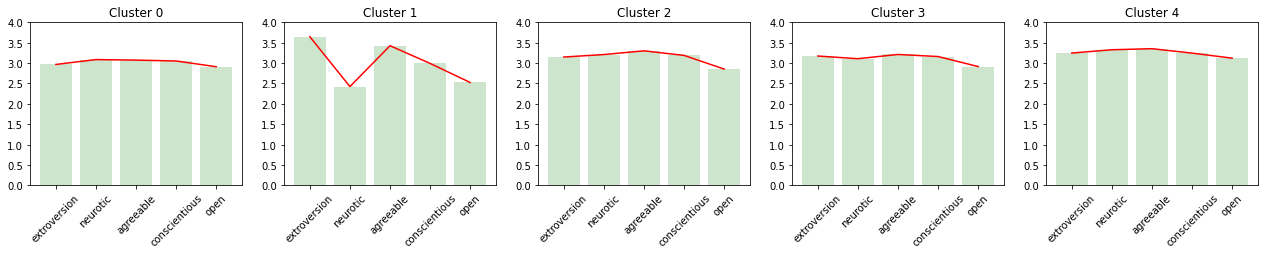

In [ ]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);
# tiap cluster itu tunjukin rata-rata nilai 0-5, nilai per personality

In [ ]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.342360,-1.823970,1
1,0.121843,3.134533,3
2,-0.736249,2.268342,3
3,0.989712,0.764996,4
4,-4.682182,1.935647,1


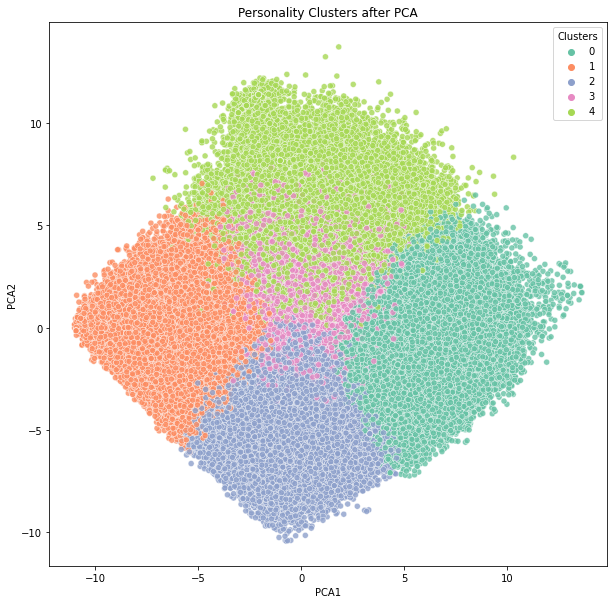

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

# Regression
Citation: [Cognitive Class](https://cocl.us/DX0108EN_CC)

In [ ]:
x_data = data_group.drop('EXT',axis=1)
x_data

,EST,AGR,CSN,OPN
0,1.0,2.0,3.0,5.0
1,2.0,1.0,3.0,1.0
2,4.0,1.0,4.0,5.0
3,3.0,2.0,2.0,4.0
4,1.0,1.0,5.0,5.0
...,...,...,...,...
1015336,3.0,4.0,3.0,4.0
1015337,5.0,3.0,3.0,4.0
1015338,1.0,5.0,4.0,5.0
1015339,4.0,3.0,4.0,3.0


In [ ]:
EXT_data = data_group['EXT']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, EXT_data, test_size=0.15, random_state=1)

print ('number of test samples:', x_test.shape[0])
print ('number of training samples:', x_train.shape[0])

number of test samples: 1520337
number of training samples: 8615243


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression().fit(x_data, EXT_data)
lr=LinearRegression()

In [ ]:
r_sq = model.score(x_data, EXT_data)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.015888547728596047
intercept: 2.824299221978167
slope: [-0.02177089 -0.04217259  0.02422156  0.09873586]


In [ ]:
y_pred = model.predict(x_data)
print('predicted response:', y_pred, sep='\n')

predicted response:
[3.28452714 2.90998541 3.28560863 ... 3.18223093 3.00379174 3.13623849]


In [ ]:
y_pred = model.intercept_ + np.sum(model.coef_ * x_data, axis=1)
print('predicted response:', y_pred, sep='\n')

predicted response:
0          3.284527
1          2.909985
2          3.285609
3          3.118028
4          3.375143
             ...   
1015336    3.057904
1015337    3.056535
1015338    3.182231
1015339    3.003792
1015340    3.136238
Length: 10135580, dtype: float64


In [ ]:
yhat_train = model.predict(x_train)
yhat_train[0:5]

array([2.69393342, 2.97575032, 2.99643971, 2.98769032, 3.21921448])

In [ ]:
yhat_test = model.predict(x_test)
yhat_test[0:5]

array([3.18223093, 3.04733351, 2.92189724, 3.1144676 , 3.27640699])

# Classification
Citation: Citation: [Cognitive Class](https://cocl.us/DX0108EN_CC)

Q&As Related to Extroversion Personality


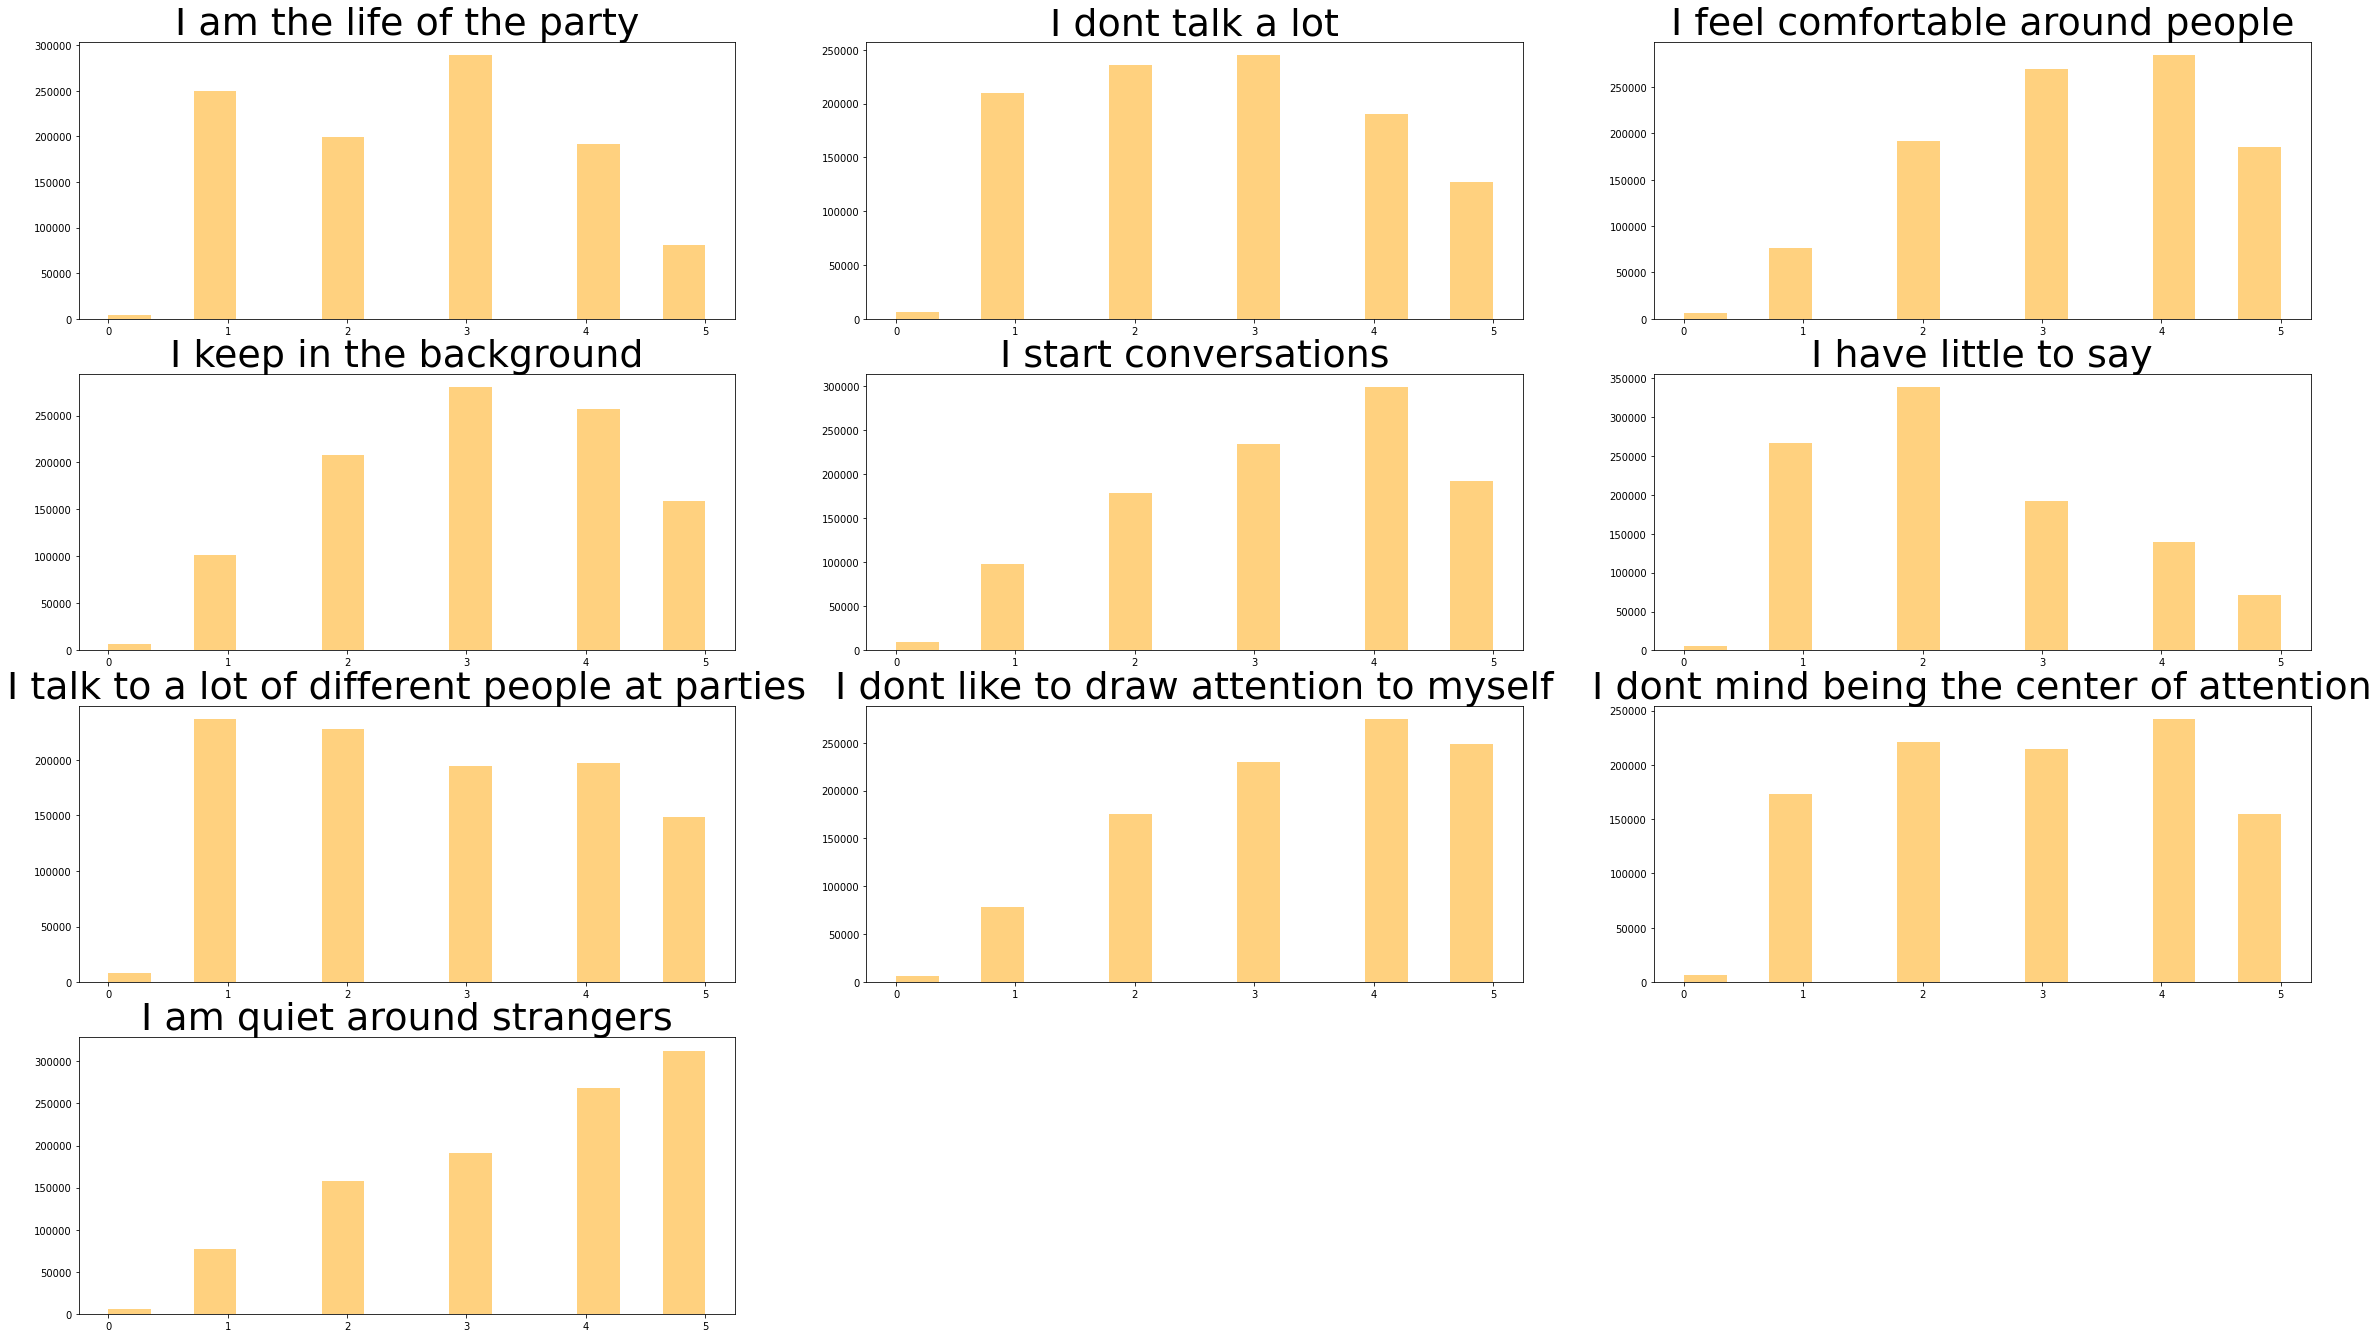

In [ ]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

In [ ]:
label_ext=[]
for i in range(0,df.shape[0]):
  x= df['EXT1'].index[i]
  extroverted = (df['EXT1'][x]+df['EXT3'][x]+df['EXT5'][x]+df['EXT7'][x]+df['EXT9'][x])/5
  introverted = (df['EXT2'][x]+df['EXT4'][x]+df['EXT6'][x]+df['EXT8'][x]+df['EXT10'][x])/5
  if extroverted > introverted :
    label_ext.append(1)
  elif introverted > extroverted :
    label_ext.append(0)
  else :
    label_ext.append(2)
  # EXT 1,3,5,7,9 is extoverted type

In [ ]:
#0=introvert (low extrovertness)
#1=extrovert
#2=netral

In [ ]:
df['Extroverness'] = label_ext
df.head()
#add a column label for EXT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,Extroverness
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991,1
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1,2,4,2,3,1,4,2,5,3,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706,0
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5,1,2,1,4,2,5,3,4,4,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833,0
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25,0
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5,1,5,1,5,1,5,3,5,5,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0,0


In [ ]:
df['Extroverness'].value_counts()
#0=introvert (low extrovertness)
#1=extrovert
#2=neutral

0    500346
1    468068
2     45144
Name: Extroverness, dtype: int64

In [ ]:
y = df['Extroverness'].values
X = df[EXT].values
#normalize data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[ 1.06922401, -1.33926905,  1.40875994, ..., -1.11235267,
         0.76985917, -1.9586327 ],
       [ 0.27833894,  1.68201038, -0.2373228 , ...,  1.24629575,
        -1.45890259,  1.10595741],
       [-0.51254613,  0.17137067,  0.58571857, ..., -0.32613653,
        -0.715982  ,  1.10595741],
       ...,
       [ 1.06922401, -0.58394919,  0.58571857, ..., -1.11235267,
         0.76985917,  0.33980988],
       [-0.51254613,  0.92669052, -0.2373228 , ...,  0.46007961,
        -0.715982  ,  0.33980988],
       [ 1.06922401, -0.58394919,  0.58571857, ..., -1.11235267,
         0.76985917,  0.33980988]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
#10 columns, 810846 rows

Train set: (810846, 10) (810846,)
Test set: (202712, 10) (202712,)


In [ ]:
k = 3
#Train Model and Predict  
# 3 is because there is 0,1,2 labels
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]
#prediction

array([1, 1, 1, 1, 0])

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9767588419995905
Test set Accuracy:  0.9581524527408343
